DEBUG: CSV Headers Detected → ['Name', 'Num_Tickets', 'Ticket_Rate', 'Win_Prob']

🎰 Lottery Expectation Summary:

▶ Vivaan Reddy:
  Bernoulli  → Mean: 0.14, Variance: 0.12
  Binomial   → Mean: 0.72, Variance: 0.62
  Uniform    → Mean: 250.00, Variance: 20833.33
  Normal     → Mean: 0.72, Variance: 0.62
--------------------------------------------------
▶ Zoya Das:
  Bernoulli  → Mean: 0.13, Variance: 0.11
  Binomial   → Mean: 0.39, Variance: 0.34
  Uniform    → Mean: 75.00, Variance: 1875.00
  Normal     → Mean: 0.39, Variance: 0.34
--------------------------------------------------
▶ Kabir Reddy:
  Bernoulli  → Mean: 0.05, Variance: 0.05
  Binomial   → Mean: 0.54, Variance: 0.51
  Uniform    → Mean: 250.00, Variance: 20833.33
  Normal     → Mean: 0.54, Variance: 0.51
--------------------------------------------------
▶ Vivaan Mehta:
  Bernoulli  → Mean: 0.12, Variance: 0.10
  Binomial   → Mean: 1.07, Variance: 0.94
  Uniform    → Mean: 225.00, Variance: 16875.00
  Normal     → Mean: 1

C:\Users\hp\AppData\Local\Temp\ipykernel_28588\1498149469.py:85: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


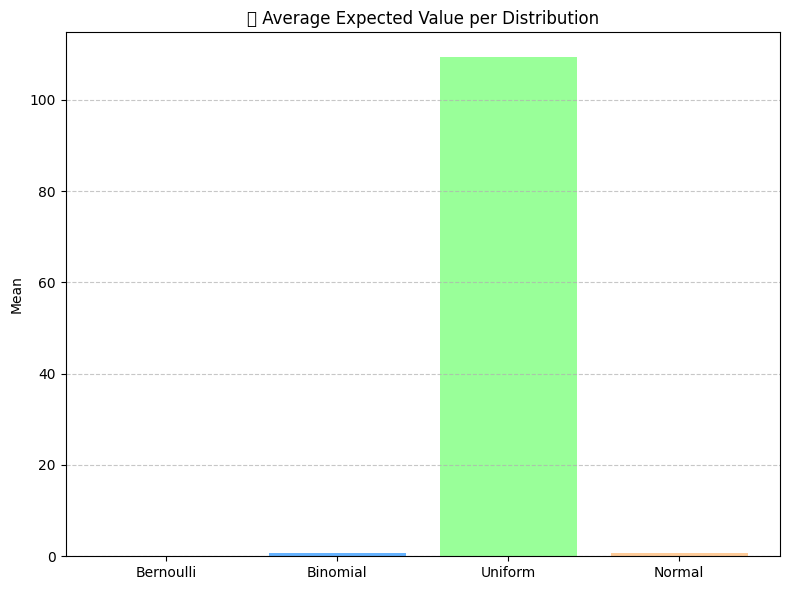

In [1]:
import csv
import math
import matplotlib.pyplot as plt

# Store all results
results = []

# Read CSV
with open('lottery_data.csv', newline='', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    reader.fieldnames = [field.strip() for field in reader.fieldnames]

    print("DEBUG: CSV Headers Detected →", reader.fieldnames)  # Optional debug

    for row in reader:
        row = {k.strip(): v.strip() for k, v in row.items()}

        try:
            name = row['Name']
            n = int(row['Num_Tickets'])
            rate = float(row['Ticket_Rate'])
            p = float(row['Win_Prob'])

            # [rest of your calculations...]


            # 🎯 Bernoulli
            mean_bernoulli = p
            var_bernoulli = p * (1 - p)

            # 🎯 Binomial
            mean_binomial = n * p
            var_binomial = n * p * (1 - p)

            # 🎯 Uniform
            a = 0
            b = n * rate
            mean_uniform = (a + b) / 2
            var_uniform = ((b - a) ** 2) / 12

            # 🎯 Normal (Approx from Binomial)
            mean_normal = mean_binomial
            var_normal = var_binomial

            # Store all in a dict
            results.append({
                'Name': name,
                'Bernoulli_Mean': mean_bernoulli,
                'Bernoulli_Var': var_bernoulli,
                'Binomial_Mean': mean_binomial,
                'Binomial_Var': var_binomial,
                'Uniform_Mean': mean_uniform,
                'Uniform_Var': var_uniform,
                'Normal_Mean': mean_normal,
                'Normal_Var': var_normal
            })
        except Exception as e:
            print(f"⚠️ Skipping row due to error: {e}")
            continue

# 📊 Print Summary Table
print("\n🎰 Lottery Expectation Summary:\n")
for r in results:
    print(f"▶ {r['Name']}:")
    print(f"  Bernoulli  → Mean: {r['Bernoulli_Mean']:.2f}, Variance: {r['Bernoulli_Var']:.2f}")
    print(f"  Binomial   → Mean: {r['Binomial_Mean']:.2f}, Variance: {r['Binomial_Var']:.2f}")
    print(f"  Uniform    → Mean: {r['Uniform_Mean']:.2f}, Variance: {r['Uniform_Var']:.2f}")
    print(f"  Normal     → Mean: {r['Normal_Mean']:.2f}, Variance: {r['Normal_Var']:.2f}")
    print("-" * 50)

# 📈 Visualization
avg_bernoulli = sum(r['Bernoulli_Mean'] for r in results) / len(results)
avg_binomial = sum(r['Binomial_Mean'] for r in results) / len(results)
avg_uniform = sum(r['Uniform_Mean'] for r in results) / len(results)
avg_normal = sum(r['Normal_Mean'] for r in results) / len(results)

labels = ['Bernoulli', 'Binomial', 'Uniform', 'Normal']
averages = [avg_bernoulli, avg_binomial, avg_uniform, avg_normal]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('🎯 Average Expected Value per Distribution')
plt.ylabel('Mean')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
